In [32]:
def sqrt_Newton(n): # Метод Ньютона
    x = n; y = (x + 1) // 2
    while y < x:
        x = y; y = (x + n // x) // 2
    return x


In [33]:
def gcd(a, b): # Алгоритм Евклида
    if b == 0: return a
    return gcd(b, a % b)


In [34]:
def sign(i): return 1 if i % 2 == 0 else -1

In [48]:
%%time
def squfof(n, m=1):
    
    if n % 2 == 0: 
        return 2
    
    g = gcd(n, m)
    
    if g > 1: 
        return g
    
  # (1) Инициализация
    
    #Проверяем, не является ли уже наше число n полным квадратом
    S = sqrt_Newton(n)
    
    if S ** 2 == n: 
        return S

    if (m * n) % 4 == 1:
        D = 2 * m * n
    else:
        D = m * n
    
    if m!=1 or n!=D:
        S = sqrt_Newton(D)

    i = 0
    P = S
    Q = D - P ** 2
    L = floor(2 * sqrt(2 * sqrt(D)))
    B = 2 * L
    Q_h = 1
    
    QUEUE = []
    
    print("N =", n, ";", "D =", D, ";", "S =", S, ";", "L =", L, ";", "B =", B)
    print ("-------------------------")
    print(" Основной цикл:")
    print ("i |","Q_(i-1)*(-1)^(i-1) |", "2 * P_n", "| Q_i*(-1)^i")
    print (0,": ", -1*Q, P, 1, QUEUE)
    
  # (2) Первыйй цикл редуцирования: выполняется до тех пор, пока форма f не станет квадратной:

    while True:
        
        print( i+1,": ", sign(i)*Q_h, P, -1*sign(i)*Q, QUEUE)
    
        # 2a:
        q = floor((S + P) / Q)
        P_h = q * Q - P
        
        # 2b:
        g = Q // gcd(Q, 2 * m)
        if g <= L:
            QUEUE.append(g)
            QUEUE.append(P % g)
        
        # 2c:
        t = Q_h + q * (P - P_h)
        Q_h = Q
        Q = t
        P = P_h
        
        # 2d:
        if i % 2 == 0: 
           # Продолжим вычисления коэффициентов Pk , Qk и rk,
           # где k = 2, 3, ... до тех пор,пока не найдем Qk , являющееся полным квадратом. 
           # Это должно произойти при некотором четном k
            r = sqrt_Newton(Q)
            if r ** 2 == Q:
                
                j = 0
                #ищем пару (r, t), для которой r делит (P − t)
                while j < len(QUEUE):
                    if r == QUEUE[j] and (P - QUEUE[j+1]) % r == 0: #QUEUE[j+1] = t
                        break
                    j = j + 2
                    
                if j < len(QUEUE):
                    if r > 1:
                        QUEUE = QUEUE[j+2:]
                    elif r == 1:
                        print("квадратная форма не существует!")
                        return 0 # квадратная форма не существует
                else: break # Перейти к шагу 3
                
        # 2e:
        i = i + 1
        if i > B:
            return 0 # Выход за пределы верхней границы B
        
  # (3) Вычисление обратного квадратного корня нашей квадратной формы:

    print (i+2,": ", -1*sign(i)*Q_h, P, sign(i)*Q, QUEUE)
    print ("-------------------------")
    # Изменим начальные значения параметров P', Q', r':
    Q_h = r
    P = P + r * ((S - P) // r)
    Q = (D - P ** 2) // Q_h
    
    print("\n Обратный цикл:")
    print ("i |","S_(i-1)*(-1)^(i-1) |", "2 * R_n", "| S_i*(-1)^i")
    print (0 ,": ", -1*sign(i)*Q_h, P, sign(i)*Q)
    
  # (4) Второй цикл: производим аналогичные вычисления в обратную сторону, пока не найдем делитель N
    
    for i in range(1, B):
    # Вычисляем, пока два подряд идущих значения P(j)' и P(j+1)' не сравняются. 
    # Тогда значение Q(j)' будет являтся нетривиальным делителем числа n:
    
        # 4a
        q = (S + P) // Q
        P_h = q * Q - P
        
        # 4b
        if P == P_h: break
        
        # 4c
        t = Q_h + q * (P - P_h)
        Q_h = Q
        Q = t
        P = P_h
    
        print (i,": ", -1*sign(i)*Q_h, P, sign(i)*Q)
        
  # (5) Выводим делитель числа N:
    
    print (i,": ", -1*sign(i)*Q, P, sign(i)*Q_h)
    print ("-------------------------")
    
    Q = Q // gcd(Q, 2 * m)
    
    if Q!=0:
        print("Нетривиальный делитель числа ", n," равен: ", Q)
    return Q

print ("\nРабота алгоритма для N = 22117019, из статьи Говера и Вагстаффа\n", squfof(22117019))
print ("\nРабота алгоритма для N = 11111, из книги \"МЕТОДЫ ФАКТОРИЗАЦИИ НАТУРАЛЬНЫХ ЧИСЕЛ\" Ш.Т. Ишмухаметова\n", squfof(11111))

N = 22117019 ; D = 22117019 ; S = 4702 ; L = 193 ; B = 386
-------------------------
 Основной цикл:
i | Q_(i-1)*(-1)^(i-1) | 2 * P_n | Q_i*(-1)^i
0 :  -8215 4702 1 []
1 :  1 4702 -8215 []
2 :  -8215 3513 1190 []
3 :  1190 3627 -7531 []
4 :  -7531 3904 913 []
5 :  913 4313 -3850 []
6 :  -3850 3387 2765 []
7 :  2765 2143 -6338 []
8 :  -6338 4195 713 []
9 :  713 4361 -4346 []
10 :  -4346 4331 773 []
11 :  773 4172 -6095 []
12 :  -6095 1923 3022 []
13 :  3022 4121 -1699 []
14 :  -1699 4374 1757 []
15 :  1757 4411 -1514 []
16 :  -1514 4673 185 []
17 :  185 4577 -6314 [185, 48]
18 :  -6314 1737 3025 [185, 48]
-------------------------

 Обратный цикл:
i | S_(i-1)*(-1)^(i-1) | 2 * R_n | S_i*(-1)^i
0 :  -55 4652 8653
1 :  8653 4001 -706
2 :  -706 4471 3013
3 :  3013 4568 -415
4 :  -415 4562 3145
5 :  3145 1728 -6083
6 :  -6083 4355 518
7 :  518 4451 -4451
8 :  -4451 4451 518
-------------------------
Нетривиальный делитель числа  22117019  равен:  4451

Работа алгоритма для N = 22117019, из с

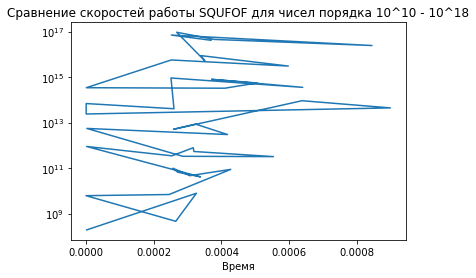

In [37]:
import time
from matplotlib import pylab as plt
from sage.misc.prandom import randrange
from sage.misc.randstate import current_randstate

numbers = []
times = []

def check_time(func):
    start_time = time.time()
    squfof(func)
    end_time = time.time()
    return end_time - start_time

for j in range(10,18):
    for i in range(5):
        def test():
            return randrange(10**j)
        with seed(i+1): test()
        with seed(i): numbers.append(test())

for i in range(len(numbers)):
    if numbers[i]%2==0:
        numbers[i] += 1
        if squfof(numbers[i]) == 0 and numbers[i]%2 != 0:
            numbers[i]+=2 
            
for i in numbers:
    times.append(check_time(squfof(i)))
        
plt.title('Сравнение скоростей работы SQUFOF для чисел порядка 10^10 - 10^18') 
plt.yscale('log')
plt.xlabel('Время')
plt.yscale('log')
plt.plot(times, numbers)
plt.show()

In [41]:
results = dict(zip(numbers, times))
results

{191940759: 3.0994415283203125e-06,
 7857222993: 0.0003261566162109375,
 459351225: 0.00026535987854003906,
 6145583009: 1.1920928955078125e-06,
 6909660685: 0.00024580955505371094,
 88108451679: 0.00042724609375,
 46511928657: 0.0003066062927246094,
 98672725705: 0.00025725364685058594,
 66275125153: 0.00027108192443847656,
 41269399053: 0.0003383159637451172,
 893831825675: 3.0994415283203125e-06,
 347159639379: 0.00025391578674316406,
 785867493065: 0.00031685829162597656,
 538721527713: 0.00031876564025878906,
 320442273293: 0.0005528926849365234,
 330904422551: 0.00028586387634277344,
 5556954969425: 3.5762786865234375e-06,
 2998346523833: 0.0004177093505859375,
 8634734880673: 0.0003235340118408203,
 5096445906445: 0.0002589225769042969,
 91983228716895: 0.000637054443359375,
 44456473769297: 0.0008971691131591797,
 23983556732089: 1.6689300537109375e-06,
 69082104604577: 1.6689300537109375e-06,
 40753264397837: 0.0002601146697998047,
 918560839256331: 0.0002512931823730469,
 355